# Fashion-MNIST introduction

This introduction exercise demonstrates classification with the following key steps:

- **Dataset** (Exploring FashionMNIST  and common error)
- **Data Loader** (Exploring batches principle)
- **Simple Model Class**
    - Layer stack with `nn.Sequence`
    - SGD for optimizer
    - `nn.CrossEntropyLoss()` for loss function
- **Training Loop** (Training the Model)
- **Graphing** (Visualizing Training and Losses and Boundary)


* Dataset : https://pytorch.org/vision/main/datasets.html
* Fashion-MNIST link:
 - https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST
 - https://github.com/zalandoresearch/fashion-mnist/tree/master/data

In [39]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Dataset

## Get dataset


**Parameter**

* `root` (str or `pathlib.Path`) – Root directory of dataset where `FashionMNIST/raw/train-images-idx3-ubyte` and F`ashionMNIST/raw/t10k-images-idx3-ubyte` exist.

* `train` (*bool, optional*) – If True, creates dataset from `train-images-idx3-ubyte`, otherwise from `t10k-images-idx3-ubyte`.

* `download` (*bool, optional*) – If True, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.

* `transform` (*callable, optional*) – A function/transform that takes in a PIL image and returns a transformed version. E.g, `transforms.RandomCrop`

* `target_transform` (*callable, optional*) – A function/transform that takes in the target and transforms it.

In [40]:
# Training dataset
train_data = datasets.FashionMNIST(
    root="data", # Directory to put downloaded dataset
    train="True", # Get training dataset train-images-idx3-ubyte
    download="True", # See above 😉
    transform=ToTensor(), # Transform image to tensor
    target_transform=None # To transform to tenser
)

# Test dataset
test_data = datasets.FashionMNIST(
    root="data",
    train="False", # Get test dataset 👌 - t10k-images-idx3-ubyte
    download="True",
    transform=ToTensor()
)

In [41]:
input, label = train_data[7]
input

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.2471, 0.1098, 0.0000, 0.0000, 0.0000,
          0.1294, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
          0.1098, 0.4941, 0.9451, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 0.9882, 0.9725, 0.4353, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.8078,
          0.9569, 0.9843, 0.9451, 0.9020, 0.9333, 0.8667, 0.8039, 0.9020,
          0.9412, 0.9020, 0.9373, 0.9843, 0.9137, 0.6471, 0.0000, 0.0000,
          0.0078, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.7804, 0.9843,
          0.8941, 0.9176, 0.9137, 0.9255, 0.9216, 0.9608, 0.9686, 0.9294,
          0.9176, 0.9373, 0.9020, 0.9020, 0.9216, 1.0000,

In [42]:
label


2

In [43]:
# Lets check how many dataset available
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 60000, 60000)

In [44]:
# Check what classes/label available
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Data Visualizing

In [45]:
print(f"Image shape: {input.shape}")

Image shape: torch.Size([1, 28, 28])


Image shape: torch.Size([1, 28, 28]):

* **1:** only 1 channel, no color channels like RGB

* **28:** This represents the height of the image in pixels. The image has 28 rows (**height**).

* **28:** This represents the width of the image in pixels. The image has 28 columns (**width**)

TypeError: Invalid shape (1, 28, 28) for image data

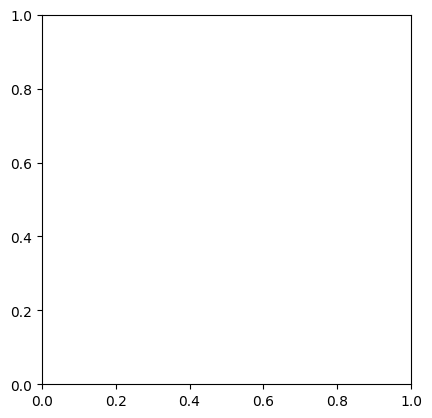

In [46]:
# NO WORRIES, code below left to be ERROR
# import matplotlib first
plt.imshow(input)


Code above produce:

TypeError: Invalid shape (1, 28, 28) for image data. Let's remove  1 to become (28, 28)

In [47]:
input_plot = input.squeeze()
input_plot.shape

torch.Size([28, 28])

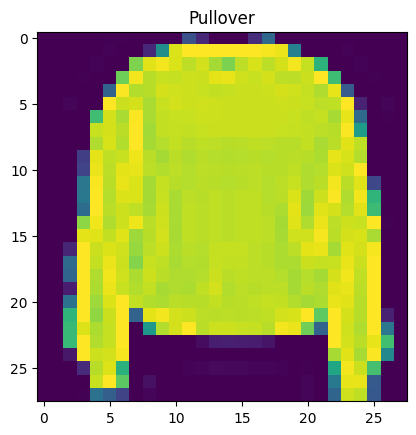

In [48]:
plt.imshow(input_plot)
plt.title(class_names[label]);

Now we will convert it to Grayscale

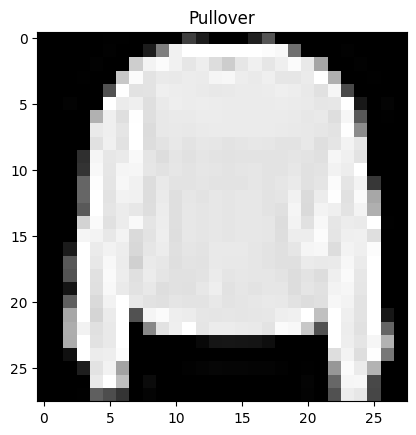

In [49]:
plt.imshow(input_plot, cmap="gray")
plt.title(class_names[label]);

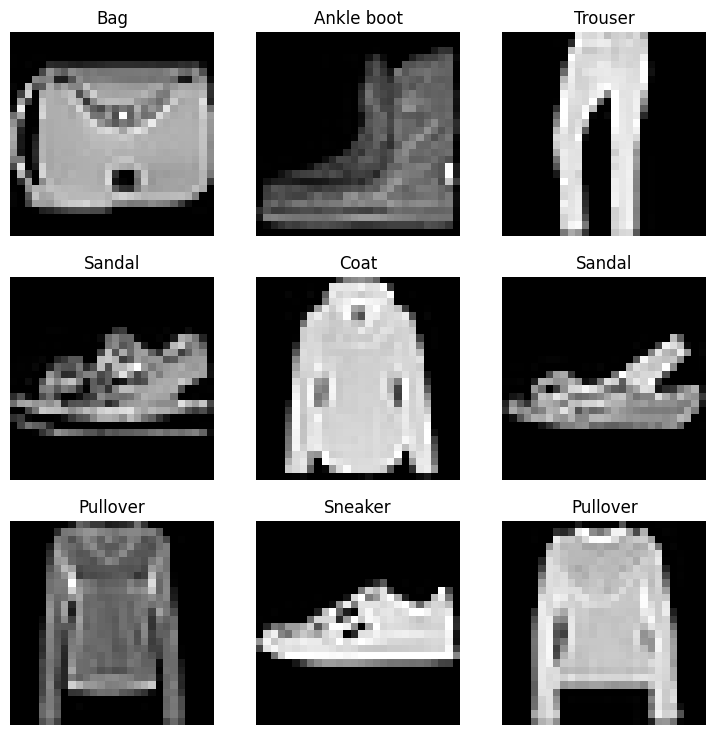

In [50]:
# Plot more images from dataset, manual seed not locked so it will pick random images every run
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.title(class_names[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")



## DataLoader

In [51]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 32

# Turn dataset to batches
train_loader = DataLoader(train_data, # Pick train data
                          batch_size=BATCH_SIZE, # Make it batches
                          shuffle=True # We will shuffle every epoch
                          )
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [52]:
# Checking
print(f"Length of train dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_loader)} batches of {BATCH_SIZE}")
print(f"Length of train data: {len(train_data)}")
print(f"Length of test data: {len(test_data)}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 1875 batches of 32
Length of train data: 60000
Length of test data: 60000


In [53]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# Basic Model

`nn.Flatten()` is similar to `reshape`, but it specifically flattens the input data while preserving the batch dimension.

The key difference is that when using `nn.Flatten()`, it automatically ensures that the batch size remains intact, so the flattening happens only on the non-batch dimensions. In contrast, `reshape` can change the batch size if you're not careful.

With `nn.Flatten()`, you don't need to worry about manually specifying the batch size—PyTorch takes care of that for you.

In [54]:
# Calling nn.Flatten()
flatten_model = nn.Flatten()

# Get single sample
X = train_features_batch[0]

# Flatten sample data
output = flatten_model(X) # Forward pass step, because all mm modules can do a forward pass

# Print out what happened
print(f"Shape before flattening: {X.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]\n")


print(X)
print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.7569, 0.6118, 0.3529, 0.5608, 0.8863,
          0.2706, 0.3059, 0.0314, 0.1098, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.2078, 0.7882, 0.9020, 0.4510, 0.7569, 0.4510,
          0.3843, 0.6745, 0.2235, 0.0784, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.5451, 0.4824, 0.2902, 0.3059, 0.4353, 0.0000,
          0.1255, 0.1922, 0.1255, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000,

## Model Class

In [55]:
# Class model
class FMNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=28*28, out_features=20),
        nn.Linear(in_features=20, out_features=10)
    )

  def forward(self, x):
    return self.layer_stack(x)

## Model initializing

In [56]:
torch.manual_seed(42)
model = FMNISTModel()

# Loss Function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

model

FMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

## Taning Loop

In [57]:
num_epochs = 5

train_losses_per_epoch = []  # To store average train losses per epoch
test_losses_per_epoch = []   # To store average test losses per epoch

for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}\n-------")

    train_losses = []
    test_losses = []

    # Looping through batches
    for batch, (inputs, labels) in enumerate(train_loader):
        model.train()

        # Forward pass (Training)
        y_pred = model(inputs)

        # Calculate loss (Training)
        train_loss = loss_fn(y_pred, labels)
        train_losses.append(train_loss.item())

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backward pass
        train_loss.backward()

        # Optimizer step
        optimizer.step()

        # TESTING (Evaluation)
        model.eval()
        with torch.no_grad():  # Use no_grad() to save memory during inference
            test_pred = model(inputs)
            test_loss = loss_fn(test_pred, labels)
            test_losses.append(test_loss.item())

        if batch % 400 == 0:
            print(f"Looked at batch {batch * len(inputs)}/{len(train_data)} samples")

    # Calculate average losses for the epoch
    avg_train_loss = sum(train_losses) / len(train_losses)
    avg_test_loss = sum(test_losses) / len(test_losses)

    # Append the average losses of the epoch to the lists for plotting
    train_losses_per_epoch.append(avg_train_loss)
    test_losses_per_epoch.append(avg_test_loss)

    print(f"\nTrain loss: {avg_train_loss:.5f} | Test loss: {avg_test_loss:.5f}\n")

Epoch: 1
-------
Looked at batch 0/60000 samples
Looked at batch 12800/60000 samples
Looked at batch 25600/60000 samples
Looked at batch 38400/60000 samples
Looked at batch 51200/60000 samples

Train loss: 0.58230 | Test loss: 0.43153

Epoch: 2
-------
Looked at batch 0/60000 samples
Looked at batch 12800/60000 samples
Looked at batch 25600/60000 samples
Looked at batch 38400/60000 samples
Looked at batch 51200/60000 samples

Train loss: 0.47323 | Test loss: 0.33662

Epoch: 3
-------
Looked at batch 0/60000 samples
Looked at batch 12800/60000 samples
Looked at batch 25600/60000 samples
Looked at batch 38400/60000 samples
Looked at batch 51200/60000 samples

Train loss: 0.45313 | Test loss: 0.32493

Epoch: 4
-------
Looked at batch 0/60000 samples
Looked at batch 12800/60000 samples
Looked at batch 25600/60000 samples
Looked at batch 38400/60000 samples
Looked at batch 51200/60000 samples

Train loss: 0.44497 | Test loss: 0.31715

Epoch: 5
-------
Looked at batch 0/60000 samples
Looked 

# Train vs test Loss visualization

# Make Prediction

In [59]:
# TODO